# Predicting Molecular Properties ([Kaggle](https://www.kaggle.com/c/champs-scalar-coupling))
## Can you measure the magnetic interactions between a pair of atoms? 
### GitHub repository: https://github.com/comchem/Predicting-Molecular-Properties

### Project Leader : Min-seok Kye

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/tidy_df.csv', index_col=0)
df.head()

E:\DataMining\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,...,atom1,x1,y1,z1,potential_energy,mulliken_charge_0,mulliken_charge_1,dipol_X,dipol_Y,dipol_Z
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,...,C,-0.012698,1.085804,0.008001,-40.52368,0.133921,-0.535689,0.0,0.0,0.0
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,...,H,1.011731,1.463751,0.000277,-40.52368,0.133921,0.133922,0.0,0.0,0.0
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,...,H,-0.540815,1.447527,-0.876644,-40.52368,0.133921,0.133923,0.0,0.0,0.0
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,...,H,-0.523814,1.437933,0.906397,-40.52368,0.133921,0.133923,0.0,0.0,0.0
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,...,C,-0.012698,1.085804,0.008001,-40.52368,0.133922,-0.535689,0.0,0.0,0.0


In [3]:
df['distance'] = np.sqrt(np.square(df['x0'] - df['x1']) + np.square(df['y0'] - df['y1']) + np.square(df['z0'] - df['z1']))

In [4]:
# Dropping non correlated factors and categories

df.columns

df = df.drop(['fc', 'sd', 'pso', 'dso', 'XX0', 'YX0', 'ZX0', 'XY0', 'YY0', 'ZY0', 'XZ0', 'YZ0', 'ZZ0', 'XX1', 'YX1', 'ZX1', 'XY1','YY1', 'ZY1', 'XZ1', 'YZ1', 'ZZ1', 'potential_energy', 'dipol_X', 'dipol_Y', 'dipol_Z'], axis=1)
df.head()                      

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,mulliken_charge_0,mulliken_charge_1,distance
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,0.133921,-0.535689,1.091953
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,0.133921,0.133922,1.783120
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,0.133921,0.133923,1.783147
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,0.133921,0.133923,1.783157
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,0.133922,-0.535689,1.091952


In [5]:
df['distance2'] = np.square(df['x0'] - df['x1']) + np.square(df['y0'] - df['y1']) + np.square(df['z0'] - df['z1'])

In [6]:
df.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,mulliken_charge_0,mulliken_charge_1,distance,distance2
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,0.133921,-0.535689,1.091953,1.192361
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,0.133921,0.133922,1.783120,3.179516
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,0.133921,0.133923,1.783147,3.179615
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,0.133921,0.133923,1.783157,3.179648
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,0.133922,-0.535689,1.091952,1.192358


In [7]:
dft = pd.read_csv('./data/test.csv')
dft.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [8]:
dftstruct = pd.read_csv('./data/structures.csv')
dftstruct.head(15)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377
7,dsgdb9nsd_000002,2,H,0.915789,1.358745,-0.028758
8,dsgdb9nsd_000002,3,H,-0.520278,1.343532,-0.775543
9,dsgdb9nsd_000003,0,O,-0.034360,0.977540,0.007602


In [9]:
dftstruct0 = dftstruct.rename(columns={"atom_index":"atom_index_0"})
dftstruct0.head()

,molecule_name,atom_index_0,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [10]:
dftstruct1 = dftstruct.rename(columns={"atom_index":"atom_index_1"})
dftstruct1.head()

,molecule_name,atom_index_1,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [11]:
df_test = pd.merge(dft, dftstruct0, how = 'left', on = ['molecule_name', 'atom_index_0'])
df_test = df_test.rename(columns = {"atom":"atom0","x":"x0", "y":"y0", "z":"z0"})
df_test.head()

,id,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0
0,4658147,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0
1,4658148,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0
2,4658149,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0
3,4658150,dsgdb9nsd_000004,3,0,1JHC,H,1.661639,0.0,1.0
4,4658151,dsgdb9nsd_000004,3,1,2JHC,H,1.661639,0.0,1.0


In [12]:
df_test = pd.merge(df_test, dftstruct1, how = 'left', on = ['molecule_name', 'atom_index_1'])
df_test = df_test.rename(columns = {"atom":"atom1","x":"x1", "y":"y1", "z":"z1"})
df_test.head()

,id,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1
0,4658147,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0
1,4658148,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0
2,4658149,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0
3,4658150,dsgdb9nsd_000004,3,0,1JHC,H,1.661639,0.0,1.0,C,0.599539,0.0,1.0
4,4658151,dsgdb9nsd_000004,3,1,2JHC,H,1.661639,0.0,1.0,C,-0.599539,0.0,1.0


In [13]:
df_test['distance'] = np.sqrt(np.square(df_test['x0'] - df_test['x1']) + np.square(df_test['y0'] - df_test['y1']) + np.square(df_test['z0'] - df_test['z1']))

In [14]:
df_test['distance2'] = np.square(df_test['x0'] - df_test['x1']) + np.square(df_test['y0'] - df_test['y1']) + np.square(df_test['z0'] - df_test['z1'])

In [15]:
df_test.head()

,id,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,distance,distance2
0,4658147,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0,2.261178,5.112926
1,4658148,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0,1.062099,1.128054
2,4658149,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0,3.323277,11.044171
3,4658150,dsgdb9nsd_000004,3,0,1JHC,H,1.661639,0.0,1.0,C,0.599539,0.0,1.0,1.062099,1.128054
4,4658151,dsgdb9nsd_000004,3,1,2JHC,H,1.661639,0.0,1.0,C,-0.599539,0.0,1.0,2.261178,5.112926


In [16]:
both = pd.concat([df, df_test], axis=0, sort=False)
both = both.set_index('molecule_name',drop=False)

both.sort_index(inplace=True)

In [17]:
both.head()

#both['id'] = both['id'].astype('int8')

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,mulliken_charge_0,mulliken_charge_1,distance,distance2,id
molecule_name,,,,,,,,,,,,,,,,,,
dsgdb9nsd_000001,84.8076,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,0.133921,-0.535689,1.091953,1.192361,NaN
dsgdb9nsd_000001,-11.2570,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,0.133921,0.133922,1.783120,3.179516,NaN
dsgdb9nsd_000001,-11.2548,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,0.133921,0.133923,1.783147,3.179615,NaN
dsgdb9nsd_000001,-11.2543,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,0.133921,0.133923,1.783157,3.179648,NaN
dsgdb9nsd_000001,84.8074,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,0.133922,-0.535689,1.091952,1.192358,NaN


In [18]:
both.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7163689 entries, dsgdb9nsd_000001 to dsgdb9nsd_133885
Data columns (total 18 columns):
scalar_coupling_constant    float64
molecule_name               object
atom_index_0                int64
atom_index_1                int64
type                        object
atom0                       object
x0                          float64
y0                          float64
z0                          float64
atom1                       object
x1                          float64
y1                          float64
z1                          float64
mulliken_charge_0           float64
mulliken_charge_1           float64
distance                    float64
distance2                   float64
id                          float64
dtypes: float64(12), int64(2), object(4)
memory usage: 1.0+ GB


In [19]:
both.columns

both = both.drop(['mulliken_charge_0', 'mulliken_charge_1'], axis=1)
both.head()    

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,distance,distance2,id
molecule_name,,,,,,,,,,,,,,,,
dsgdb9nsd_000001,84.8076,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,1.192361,NaN
dsgdb9nsd_000001,-11.2570,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,3.179516,NaN
dsgdb9nsd_000001,-11.2548,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,3.179615,NaN
dsgdb9nsd_000001,-11.2543,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,3.179648,NaN
dsgdb9nsd_000001,84.8074,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.192358,NaN


In [20]:
# qm9 data link

import pickle

qm9 = pd.read_pickle('./working/data.covs.pickle')
qm9.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,rc_A,rc_B,rc_C,mu,...,Cv,freqs_min,freqs_max,freqs_mean,linear,mulliken_min,mulliken_max,mulliken_mean,mulliken_atom_0,mulliken_atom_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,157.7118,157.70997,157.70699,0.0,...,6.469,1341.307,3151.7078,2182.525478,1.0,-0.535689,0.133923,0.0,0.133921,-0.535689
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,157.7118,157.70997,157.70699,0.0,...,6.469,1341.307,3151.7078,2182.525478,1.0,-0.535689,0.133923,0.0,0.133921,0.133922
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,157.7118,157.70997,157.70699,0.0,...,6.469,1341.307,3151.7078,2182.525478,1.0,-0.535689,0.133923,0.0,0.133921,0.133923
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,157.7118,157.70997,157.70699,0.0,...,6.469,1341.307,3151.7078,2182.525478,1.0,-0.535689,0.133923,0.0,0.133921,0.133923
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,157.7118,157.70997,157.70699,0.0,...,6.469,1341.307,3151.7078,2182.525478,1.0,-0.535689,0.133923,0.0,0.133922,-0.535689


In [21]:
qm9.columns

qm9 = qm9.drop(['id', 'rc_A', 'rc_B', 'rc_C', 'mu', 'alpha',
       'homo', 'lumo', 'gap', 'r2', 'zpve', 'U0', 'U', 'H', 'G', 'Cv',
       'freqs_min', 'freqs_max', 'freqs_mean', 'linear', 'mulliken_min',
       'mulliken_max', 'mulliken_mean'], axis=1)
qm9.head()          

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,mulliken_atom_0,mulliken_atom_1
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,0.133921,-0.535689
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,0.133921,0.133922
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,0.133921,0.133923
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,0.133921,0.133923
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,0.133922,-0.535689


In [22]:
qm9 = qm9.rename(columns={"mulliken_atom_0":"mulliken_charge_0", "mulliken_atom_1":"mulliken_charge_1"})
qm9 = qm9.set_index('molecule_name',drop=False)
qm9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7163689 entries, dsgdb9nsd_000001 to dsgdb9nsd_133885
Data columns (total 7 columns):
molecule_name               object
atom_index_0                int64
atom_index_1                int64
type                        object
scalar_coupling_constant    float64
mulliken_charge_0           float64
mulliken_charge_1           float64
dtypes: float64(3), int64(2), object(2)
memory usage: 437.2+ MB


In [23]:
qm9 = qm9.rename(columns={"molecule_name":"molecule_name_1", "atom_index_0":"atom_index_0_1", "atom_index_1":"atom_index_1_1", "type":"type_1", "scalar_coupling_constant":"scalar_coupling_constant_1", "mulliken_charge_0":"mulliken_charge_0_1", "mulliken_charge_1":"mulliken_charge_1_1"})

In [24]:
qm9.head()

,molecule_name_1,atom_index_0_1,atom_index_1_1,type_1,scalar_coupling_constant_1,mulliken_charge_0_1,mulliken_charge_1_1
molecule_name,,,,,,,
dsgdb9nsd_000001,dsgdb9nsd_000001,1,0,1JHC,84.8076,0.133921,-0.535689
dsgdb9nsd_000001,dsgdb9nsd_000001,1,2,2JHH,-11.2570,0.133921,0.133922
dsgdb9nsd_000001,dsgdb9nsd_000001,1,3,2JHH,-11.2548,0.133921,0.133923
dsgdb9nsd_000001,dsgdb9nsd_000001,1,4,2JHH,-11.2543,0.133921,0.133923
dsgdb9nsd_000001,dsgdb9nsd_000001,2,0,1JHC,84.8074,0.133922,-0.535689


In [25]:
data = pd.concat([both, qm9], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7163689 entries, dsgdb9nsd_000001 to dsgdb9nsd_133885
Data columns (total 23 columns):
scalar_coupling_constant      float64
molecule_name                 object
atom_index_0                  int64
atom_index_1                  int64
type                          object
atom0                         object
x0                            float64
y0                            float64
z0                            float64
atom1                         object
x1                            float64
y1                            float64
z1                            float64
distance                      float64
distance2                     float64
id                            float64
molecule_name_1               object
atom_index_0_1                int64
atom_index_1_1                int64
type_1                        object
scalar_coupling_constant_1    float64
mulliken_charge_0_1           float64
mulliken_charge_1_1           float64
dtypes: 

In [26]:
data.columns

data = data.drop(['molecule_name_1', 'atom_index_0_1', 'atom_index_1_1',
       'type_1', 'scalar_coupling_constant_1'], axis=1)
data.head()       

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,distance,distance2,id,mulliken_charge_0_1,mulliken_charge_1_1
molecule_name,,,,,,,,,,,,,,,,,,
dsgdb9nsd_000001,84.8076,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,1.192361,NaN,0.133921,-0.535689
dsgdb9nsd_000001,-11.2570,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,3.179516,NaN,0.133921,0.133922
dsgdb9nsd_000001,-11.2548,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,3.179615,NaN,0.133921,0.133923
dsgdb9nsd_000001,-11.2543,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,3.179648,NaN,0.133921,0.133923
dsgdb9nsd_000001,84.8074,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.192358,NaN,0.133922,-0.535689


In [27]:
data = data.rename(columns = {"mulliken_charge_0_1":"mulliken_charge_0","mulliken_charge_1_1":"mulliken_charge_1"})

data.head(200)

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,distance,distance2,id,mulliken_charge_0,mulliken_charge_1
molecule_name,,,,,,,,,,,,,,,,,,
dsgdb9nsd_000001,84.80760,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,1.192361,NaN,0.133921,-0.535689
dsgdb9nsd_000001,-11.25700,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,3.179516,NaN,0.133921,0.133922
dsgdb9nsd_000001,-11.25480,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,3.179615,NaN,0.133921,0.133923
dsgdb9nsd_000001,-11.25430,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,3.179648,NaN,0.133921,0.133923
dsgdb9nsd_000001,84.80740,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.192358,NaN,0.133922,-0.535689
dsgdb9nsd_000001,-11.25410,dsgdb9nsd_000001,2,3,2JHH,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644,1.783158,3.179651,NaN,0.133922,0.133923
dsgdb9nsd_000001,-11.25480,dsgdb9nsd_000001,2,4,2JHH,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397,1.783148,3.179618,NaN,0.133922,0.133923
dsgdb9nsd_000001,84.80930,dsgdb9nsd_000001,3,0,1JHC,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001,1.091946,1.192347,NaN,0.133923,-0.535689
dsgdb9nsd_000001,-11.25430,dsgdb9nsd_000001,3,4,2JHH,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397,1.783148,3.179616,NaN,0.133923,0.133923


In [28]:
data['dist_charge1'] = data['distance']*data['mulliken_charge_1']
data.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,distance,distance2,id,mulliken_charge_0,mulliken_charge_1,dist_charge1
molecule_name,,,,,,,,,,,,,,,,,,,
dsgdb9nsd_000001,84.8076,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,1.192361,NaN,0.133921,-0.535689,-0.584947
dsgdb9nsd_000001,-11.2570,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,3.179516,NaN,0.133921,0.133922,0.238799
dsgdb9nsd_000001,-11.2548,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,3.179615,NaN,0.133921,0.133923,0.238804
dsgdb9nsd_000001,-11.2543,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,3.179648,NaN,0.133921,0.133923,0.238806
dsgdb9nsd_000001,84.8074,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.192358,NaN,0.133922,-0.535689,-0.584946


In [29]:
data['dist_charge0'] = data['distance']*data['mulliken_charge_0']
data.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,distance,distance2,id,mulliken_charge_0,mulliken_charge_1,dist_charge1,dist_charge0
molecule_name,,,,,,,,,,,,,,,,,,,,
dsgdb9nsd_000001,84.8076,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,1.192361,NaN,0.133921,-0.535689,-0.584947,0.146235
dsgdb9nsd_000001,-11.2570,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,3.179516,NaN,0.133921,0.133922,0.238799,0.238797
dsgdb9nsd_000001,-11.2548,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,3.179615,NaN,0.133921,0.133923,0.238804,0.238801
dsgdb9nsd_000001,-11.2543,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,3.179648,NaN,0.133921,0.133923,0.238806,0.238802
dsgdb9nsd_000001,84.8074,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.192358,NaN,0.133922,-0.535689,-0.584946,0.146236


In [30]:
train = data.loc[~data['scalar_coupling_constant'].isnull()].reset_index(drop=True)
test = data.loc[data['scalar_coupling_constant'].isnull()].reset_index(drop=True)

In [31]:
test['id'] = test['id'].astype('int64')

In [32]:
test.head(10)

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,distance,distance2,id,mulliken_charge_0,mulliken_charge_1,dist_charge1,dist_charge0
0,NaN,dsgdb9nsd_000004,3,1,2JHC,H,1.661639,0.000000,1.000000,C,-0.599539,0.000000,1.000000,2.261178,5.112926,4658151,0.207019,-0.207019,-0.468107,0.468107
1,NaN,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.000000,1.000000,H,1.661639,0.000000,1.000000,3.323277,11.044171,4658149,0.207019,0.207019,0.687982,0.687982
2,NaN,dsgdb9nsd_000004,3,0,1JHC,H,1.661639,0.000000,1.000000,C,0.599539,0.000000,1.000000,1.062099,1.128054,4658150,0.207019,-0.207019,-0.219875,0.219875
3,NaN,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.000000,1.000000,C,-0.599539,0.000000,1.000000,1.062099,1.128054,4658148,0.207019,-0.207019,-0.219875,0.219875
4,NaN,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.000000,1.000000,C,0.599539,0.000000,1.000000,2.261178,5.112926,4658147,0.207019,-0.207019,-0.468107,0.468107
5,NaN,dsgdb9nsd_000015,4,2,3JHC,H,-0.546896,1.793435,-0.872511,C,0.637949,-0.553297,-1.113582,2.639910,6.969124,4658157,0.101229,-0.223408,-0.589777,0.267235
6,NaN,dsgdb9nsd_000015,8,2,1JHC,H,0.599594,-1.641802,-1.024076,C,0.637949,-0.553297,-1.113582,1.092852,1.194325,4658169,0.126612,-0.223408,-0.244152,0.138368
7,NaN,dsgdb9nsd_000015,3,2,3JHC,H,1.005284,1.810158,0.004656,C,0.637949,-0.553297,-1.113582,2.640324,6.971311,4658153,0.101236,-0.223408,-0.589870,0.267296
8,NaN,dsgdb9nsd_000015,8,0,3JHC,H,0.599594,-1.641802,-1.024076,C,-0.014821,1.392412,0.005671,3.262567,10.644340,4658168,0.126612,-0.223408,-0.728883,0.413080
9,NaN,dsgdb9nsd_000015,7,8,2JHH,H,1.692653,-0.238684,-1.174777,H,0.599594,-1.641802,-1.024076,1.785001,3.186227,4658167,0.101229,0.126612,0.226002,0.180694


In [33]:
train.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,atom0,x0,y0,z0,atom1,x1,y1,z1,distance,distance2,id,mulliken_charge_0,mulliken_charge_1,dist_charge1,dist_charge0
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,1.192361,NaN,0.133921,-0.535689,-0.584947,0.146235
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,3.179516,NaN,0.133921,0.133922,0.238799,0.238797
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,3.179615,NaN,0.133921,0.133923,0.238804,0.238801
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,3.179648,NaN,0.133921,0.133923,0.238806,0.238802
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.192358,NaN,0.133922,-0.535689,-0.584946,0.146236


In [34]:
data_train = pd.get_dummies(train, columns=['type', 'atom1'], drop_first=True)
data_train.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,atom0,x0,y0,z0,x1,y1,...,dist_charge0,type_1JHN,type_2JHC,type_2JHH,type_2JHN,type_3JHC,type_3JHH,type_3JHN,atom1_H,atom1_N
0,84.8076,dsgdb9nsd_000001,1,0,H,0.002150,-0.006031,0.001976,-0.012698,1.085804,...,0.146235,0,0,0,0,0,0,0,0,0
1,-11.2570,dsgdb9nsd_000001,1,2,H,0.002150,-0.006031,0.001976,1.011731,1.463751,...,0.238797,0,0,1,0,0,0,0,1,0
2,-11.2548,dsgdb9nsd_000001,1,3,H,0.002150,-0.006031,0.001976,-0.540815,1.447527,...,0.238801,0,0,1,0,0,0,0,1,0
3,-11.2543,dsgdb9nsd_000001,1,4,H,0.002150,-0.006031,0.001976,-0.523814,1.437933,...,0.238802,0,0,1,0,0,0,0,1,0
4,84.8074,dsgdb9nsd_000001,2,0,H,1.011731,1.463751,0.000277,-0.012698,1.085804,...,0.146236,0,0,0,0,0,0,0,0,0


In [35]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 27 columns):
scalar_coupling_constant    float64
molecule_name               object
atom_index_0                int64
atom_index_1                int64
atom0                       object
x0                          float64
y0                          float64
z0                          float64
x1                          float64
y1                          float64
z1                          float64
distance                    float64
distance2                   float64
id                          float64
mulliken_charge_0           float64
mulliken_charge_1           float64
dist_charge1                float64
dist_charge0                float64
type_1JHN                   uint8
type_2JHC                   uint8
type_2JHH                   uint8
type_2JHN                   uint8
type_3JHC                   uint8
type_3JHH                   uint8
type_3JHN                   uint8
atom1_H

In [36]:
data_test = pd.get_dummies(test, columns=['type', 'atom1'], drop_first=True)
data_test.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,atom0,x0,y0,z0,x1,y1,...,dist_charge0,type_1JHN,type_2JHC,type_2JHH,type_2JHN,type_3JHC,type_3JHH,type_3JHN,atom1_H,atom1_N
0,NaN,dsgdb9nsd_000004,3,1,H,1.661639,0.0,1.0,-0.599539,0.0,...,0.468107,0,1,0,0,0,0,0,0,0
1,NaN,dsgdb9nsd_000004,2,3,H,-1.661639,0.0,1.0,1.661639,0.0,...,0.687982,0,0,0,0,0,1,0,1,0
2,NaN,dsgdb9nsd_000004,3,0,H,1.661639,0.0,1.0,0.599539,0.0,...,0.219875,0,0,0,0,0,0,0,0,0
3,NaN,dsgdb9nsd_000004,2,1,H,-1.661639,0.0,1.0,-0.599539,0.0,...,0.219875,0,0,0,0,0,0,0,0,0
4,NaN,dsgdb9nsd_000004,2,0,H,-1.661639,0.0,1.0,0.599539,0.0,...,0.468107,0,1,0,0,0,0,0,0,0


# Model by Light GB

In [37]:
import lightgbm as lgb
import numpy as np
import random
from sklearn.model_selection import GroupKFold, StratifiedKFold, KFold
import seaborn as sn
import pdb
from pathlib import Path
import os

def setSeeds(seed = 1234):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [38]:
params_lgb = {'application': 'regression_l1',
              'metric': 'l1',
              'num_leaves': 90,
              'max_depth': 7,
              'learning_rate': 1,
              'bagging_freq' : 1,
              'bagging_fraction': 0.9,
              'feature_fraction': 0.9,
              'min_split_gain': 0.02,
              'min_child_samples': 50,
              'min_child_weight': 0.01,
              'lambda_l2': 0.05,
              'lambda_l1': 0.01,
              'verbosity': -1,
              'data_random_seed': 17}

FOLDS_VALID = 5
meta_cols = ['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'atom0', 'scalar_coupling_constant']
target = 'scalar_coupling_constant'

fi = pd.DataFrame()
models = []

setSeeds(1234)

data_filt = data_train.drop(meta_cols, axis=1, errors='ignore')
predictions = np.zeros(len(data_filt))

kf = KFold(n_splits=FOLDS_VALID, random_state=1234, shuffle=True)
fold_splits = kf.split(data_filt)

for i, (dev_index, val_index) in enumerate(fold_splits):

    print('Fold', i)

    Xt, Xv = data_filt.loc[dev_index, :], data_filt.loc[val_index, :]
    yt, yv = data_train.loc[dev_index, target], data_train.loc[val_index, target]

    d_train = lgb.Dataset(Xt, yt)
    d_valid = lgb.Dataset(Xv, yv)

    watchlist = [d_train, d_valid]
    model = lgb.train(params_lgb,
                      train_set=d_train,
                      num_boost_round=500,
                      valid_sets=watchlist,
                      verbose_eval=100,
                      early_stopping_rounds=100)

    predictions[val_index] = model.predict(Xv, num_iteration = model.best_iteration)

    fold_importance = pd.DataFrame()
    fold_importance["feature"] = Xt.columns
    fold_importance["importance"] = model.feature_importance()
    fold_importance["fold"] = i
    fi = pd.concat([fi, fold_importance], axis=0)

    models.append(model)

print('MAE', (predictions - data_train[target]).abs().mean())

Fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.80676	valid_1's l1: 1.83341
[200]	training's l1: 1.73633	valid_1's l1: 1.77838
[300]	training's l1: 1.69537	valid_1's l1: 1.75093
[400]	training's l1: 1.66001	valid_1's l1: 1.7279
[500]	training's l1: 1.63508	valid_1's l1: 1.71444
Did not meet early stopping. Best iteration is:
[500]	training's l1: 1.63508	valid_1's l1: 1.71444
Fold 1
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.80443	valid_1's l1: 1.82376
[200]	training's l1: 1.72933	valid_1's l1: 1.76485
[300]	training's l1: 1.68492	valid_1's l1: 1.73547
[400]	training's l1: 1.65502	valid_1's l1: 1.71783
[500]	training's l1: 1.63091	valid_1's l1: 1.70548
Did not meet early stopping. Best iteration is:
[500]	training's l1: 1.63091	valid_1's l1: 1.70548
Fold 2
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.8114	valid_1's l1: 1.83161
[200]	training's l1: 1.738	valid_

In [39]:
data_test_filt = data_test.drop(meta_cols, axis=1, errors='ignore')

preds = np.zeros((FOLDS_VALID, len(data_test)))
for i in range(FOLDS_VALID):
    print('Fold', i)
    preds[i,:] = models[i].predict(data_test_filt, num_iteration=models[i].best_iteration)

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


In [40]:
sub = pd.read_csv('./data/sample_submission.csv')

sub['id'] = data_test['id']
sub['scalar_coupling_constant'] = preds.mean(0)
sub.to_csv('./working/submission.csv', index=False)

Text(0.5, 1.0, 'LGB Features (avg over folds)')

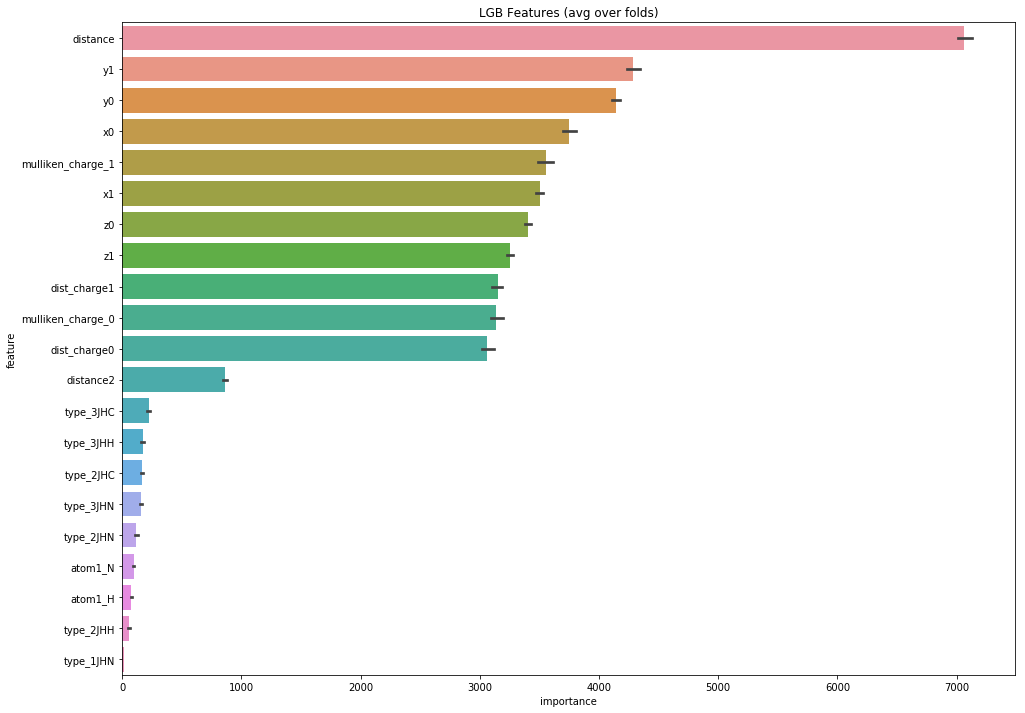

In [41]:
fi['score'] = fi[["feature", "importance"]].groupby('feature').transform('mean')

plt.figure(figsize=(16, 12))
sn.barplot(x="importance", y="feature", data=fi.sort_values(by="score", ascending=False))
plt.title('LGB Features (avg over folds)')